# Data understanding and Preprocessing

In [370]:
# importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math
import plotly.express as px
from scipy import stats
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import os

#To display graphics inline
%matplotlib inline

In [371]:

os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Customer_Churn_Prediction.ipynb',
 'README.md',
 'sample_submission.csv',
 'Test.csv',
 'Train.csv',
 'VariableDefinitions.csv']

In [372]:
#load the dataset
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [373]:
train.head(2)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0


In [374]:
test.tail(2)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
99998,afa76e894df4201fc77eb714de7d1f262299611a,THIES,K > 24 month,2500.0,4.0,2515.0,838.0,4.0,NaN,43.0,106.0,4.0,NaN,NaN,NO,16,All-net 500F=2000F;5d,5.0
99999,c08a2d84b87c1f5d4bb318114f508b77aa8e2663,MATAM,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,7,NaN,NaN


In [375]:
train.shape

(400000, 19)

In [376]:
test.shape

(100000, 18)

In [377]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
user_id           400000 non-null object
REGION            242480 non-null object
TENURE            400000 non-null object
MONTANT           259723 non-null float64
FREQUENCE_RECH    259723 non-null float64
REVENUE           265337 non-null float64
ARPU_SEGMENT      265337 non-null float64
FREQUENCE         265337 non-null float64
DATA_VOLUME       203146 non-null float64
ON_NET            254181 non-null float64
ORANGE            233683 non-null float64
TIGO              160614 non-null float64
ZONE1             31690 non-null float64
ZONE2             25513 non-null float64
MRG               400000 non-null object
REGULARITY        400000 non-null int64
TOP_PACK          232671 non-null object
FREQ_TOP_PACK     232671 non-null float64
CHURN             400000 non-null int64
dtypes: float64(12), int64(2), object(5)
memory usage: 58.0+ MB


In [378]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
user_id           100000 non-null object
REGION            60707 non-null object
TENURE            100000 non-null object
MONTANT           65049 non-null float64
FREQUENCE_RECH    65049 non-null float64
REVENUE           66510 non-null float64
ARPU_SEGMENT      66510 non-null float64
FREQUENCE         66510 non-null float64
DATA_VOLUME       50662 non-null float64
ON_NET            63617 non-null float64
ORANGE            58800 non-null float64
TIGO              40212 non-null float64
ZONE1             7680 non-null float64
ZONE2             6422 non-null float64
MRG               100000 non-null object
REGULARITY        100000 non-null int64
TOP_PACK          58297 non-null object
FREQ_TOP_PACK     58297 non-null float64
dtypes: float64(12), int64(1), object(5)
memory usage: 13.7+ MB


In [379]:
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


#### Finding and Treating Duplicate  Cases

In [380]:
print(train.shape)
print (train['user_id'].unique().shape)

# There are no duplicate cases

(400000, 19)
(400000,)


#### Feature Engineering

In [381]:
# 1. Engineer a new feature called 'Off_net' to indicate total calls of each cases to other networks
# Off_net = Tigo + Orange

# train['off_net'] = train['tigo'] + train['orange'] 
# train.head()


### Finding and Treating Missing Values

In [382]:
train.isnull().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [383]:
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [384]:
train.columns

Index(['user_id', 'region', 'tenure', 'montant', 'frequence_rech', 'revenue',
       'arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
       'zone1', 'zone2', 'mrg', 'regularity', 'top_pack', 'freq_top_pack',
       'churn'],
      dtype='object')

In [385]:
#To get the percentage of missing values in each column

percent_missing = train.isnull().sum() * 100 / len(train)
print(percent_missing.round(2))

user_id            0.00
region            39.38
tenure             0.00
montant           35.07
frequence_rech    35.07
revenue           33.67
arpu_segment      33.67
frequence         33.67
data_volume       49.21
on_net            36.45
orange            41.58
tigo              59.85
zone1             92.08
zone2             93.62
mrg                0.00
regularity         0.00
top_pack          41.83
freq_top_pack     41.83
churn              0.00
dtype: float64


Variables zone1 and zone2 have 90percent missing values, it will be removed.
Mrg has same values all through, zero variance in the data so it will be removed.
Tenure also has low variance nd will be removed as its not informative.


In [386]:
cols_to_drop = ['zone1', 'zone2', 'mrg']

train.drop(labels = cols_to_drop, axis =1, inplace = True)
test.drop(cols_to_drop, axis = 1, inplace = True)

In [387]:
train.head(2)

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,"Data: 100 F=40MB,24H",22.0,0


In [388]:
cat_col = ['region', 'tenure', 'top_pack', 'churn']


In [389]:
for col in cat_col:
    nuniq = train[col].nunique()
    print(col, nuniq)

region 14
tenure 8
top_pack 111
churn 2


In [390]:
for col in cat_col:
    print(train[col].value_counts()*100 / len(train))

DAKAR          23.87925
THIES           8.34350
SAINT-LOUIS     5.53125
LOUGA           4.62825
KAOLACK         4.51050
DIOURBEL        3.14400
TAMBACOUNDA     2.56825
KAFFRINE        2.04525
KOLDA           1.80100
FATICK          1.65950
MATAM           1.31375
ZIGUINCHOR      1.00300
SEDHIOU         0.14725
KEDOUGOU        0.04525
Name: region, dtype: float64
K > 24 month     94.85975
I 18-21 month     2.07800
H 15-18 month     1.21450
G 12-15 month     0.69700
J 21-24 month     0.58125
F 9-12 month      0.44275
E 6-9 month       0.08975
D 3-6 month       0.03700
Name: tenure, dtype: float64
All-net 500F=2000F;5d                        14.66875
On net 200F=Unlimited _call24H                7.09675
Data:490F=1GB,7d                              5.41525
Data: 100 F=40MB,24H                          3.89750
Mixt 250F=Unlimited_call24H                   3.17800
MIXT:500F= 2500F on net _2500F off net;2d     3.00500
Data:1000F=2GB,30d                            2.80125
All-net 500F =2000F_

In [391]:
# missing values in Tenure will be filled with the mode value. 
mode_train = train['tenure'].mode()
train['tenure'] = train['tenure'].fillna(mode_train[0])
test['tenure'].fillna(test['tenure'].mode()[0], inplace = True)


In [392]:
train['tenure'] = train['tenure'].str.replace('month', '')

In [393]:
# missing values in region and top_pack will be coded as a new category "Unknown_Region" and 'Unknown_topack'
train['region'].fillna('Unknown_region', inplace = True)
test['region'].fillna('Unknown_region', inplace = True)

train['top_pack'].fillna('Unknown_topack', inplace = True)
test['top_pack'].fillna('Unknown_topack', inplace = True)

In [394]:
test['tenure'].fillna(test['tenure'].mode()[0], inplace = True)

In [395]:
datasets = [train, test]
for dataset in datasets:
    dataset.loc[dataset['top_pack'].str.contains('All-net', case = False), 'top_pack'] = 'Call'
    dataset.loc[dataset['top_pack'].str.contains('On net', case = False), 'top_pack'] = 'Call'
    dataset.loc[dataset['top_pack'].str.contains('On-net', case = False), 'top_pack'] = 'Call'
    dataset.loc[dataset['top_pack'].str.contains('Data', case = False), 'top_pack'] = 'Data'
    dataset.loc[dataset['top_pack'].str.contains('mixt', case = False), 'top_pack'] = 'Call_Data'
    

In [396]:
train.loc[~train['top_pack'].isin(['Call', 'Data', 'Call_Data', 'Unknown_topack']), 'top_pack'] = 'Others'

In [397]:
train.head(20)

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,62,Call,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,Unknown_region,K > 24,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,Data,22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,32,Call,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18,Call,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,50,Unknown_topack,NaN,0
5,2bd9ab2983615149380a63f44a66780f4fa19a4a,THIES,K > 24,5500.0,9.0,5359.0,1786.0,19.0,6084.0,7.0,12.0,5.0,30,Data,7.0,0
6,b2d9c4bdceaafe305e8424c97f64e4ba880d0a97,Unknown_region,K > 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Unknown_topack,NaN,0
7,8ebce4e82fa049f96ff1aa460217171af4e4ede1,SAINT-LOUIS,H 15-18,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,5,Unknown_topack,NaN,1
8,ebfbd28870a7663d49ec79799f9fd59e8c5655ed,TAMBACOUNDA,K > 24,22500.0,8.0,22230.0,7410.0,16.0,14956.0,6336.0,1017.0,185.0,62,Data,3.0,0
9,cf5d5edda4805f7f526884cee8bde797213eeefa,Unknown_region,G 12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown_topack,NaN,0


In [398]:
# To fill in missing values for the rest of the numeric variables, 
# For the tree-based model, we will fill with -1
# For the other models, we will fill with the median, taking into consideration that these columns are skewed

other_num_col = ['montant', 'frequence_rech', 'revenue','arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo', 'freq_top_pack']

# for col in other_num_col:
#     test[col].fillna(-1, inplace = True)
#     train[col].fillna(-1, inplace = True)
    
for col in other_num_col:
    test[col].fillna(test[col].median(), inplace = True)
    train[col].fillna(test[col].median(), inplace = True)

In [399]:
train.head(10)

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24,17000.0,32.0,18000.0,6000.0,34.0,268.0,97.0,355.0,6.0,62,Call,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,Unknown_region,K > 24,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,Data,22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24,1500.0,3.0,1500.0,500.0,3.0,268.0,30.0,30.0,6.0,32,Call,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18,Call,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24,3000.0,7.0,498.0,166.0,3.0,1.0,1.0,3.0,6.0,50,Unknown_topack,5.0,0
5,2bd9ab2983615149380a63f44a66780f4fa19a4a,THIES,K > 24,5500.0,9.0,5359.0,1786.0,19.0,6084.0,7.0,12.0,5.0,30,Data,7.0,0
6,b2d9c4bdceaafe305e8424c97f64e4ba880d0a97,Unknown_region,K > 24,3000.0,7.0,3000.0,1000.0,9.0,268.0,27.0,28.0,6.0,7,Unknown_topack,5.0,0
7,8ebce4e82fa049f96ff1aa460217171af4e4ede1,SAINT-LOUIS,H 15-18,3000.0,7.0,3000.0,1000.0,9.0,0.0,27.0,28.0,6.0,5,Unknown_topack,5.0,1
8,ebfbd28870a7663d49ec79799f9fd59e8c5655ed,TAMBACOUNDA,K > 24,22500.0,8.0,22230.0,7410.0,16.0,14956.0,6336.0,1017.0,185.0,62,Data,3.0,0
9,cf5d5edda4805f7f526884cee8bde797213eeefa,Unknown_region,G 12-15,3000.0,7.0,3000.0,1000.0,9.0,268.0,27.0,28.0,6.0,1,Unknown_topack,5.0,0


In [400]:
test.head(10)

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,Unknown_region,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,268.0,27.0,28.0,6.0,1,Unknown_topack,5.0
1,5335efd940280b82143272275637d1e65d37eadb,Unknown_region,K > 24 month,3000.0,7.0,10.0,3.0,1.0,268.0,27.0,28.0,6.0,2,Unknown_topack,5.0
2,a581f4fa08677c26f83f643248c667e241043086,Unknown_region,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,27.0,7.0,2.0,27,Data,17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,268.0,128.0,555.0,280.0,61,Call,65.0
5,43dc48b3447e69dd2160b05de193fc1694edd54a,Unknown_region,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,44.0,27.0,28.0,6.0,22,Unknown_topack,5.0
6,1db4bb61710bb25063217297d8cd8c4d4cdfcbbc,KAFFRINE,K > 24 month,200.0,1.0,3000.0,1000.0,9.0,268.0,27.0,28.0,6.0,12,Unknown_topack,5.0
7,37f4f47f7d359015945946cf6762782c4026836a,Unknown_region,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,268.0,27.0,28.0,6.0,4,Unknown_topack,5.0
8,e74408b87372327c95136af36ec4155219e07269,DAKAR,K > 24 month,5500.0,16.0,5611.0,1870.0,17.0,2105.0,65.0,66.0,8.0,56,Data,4.0
9,7e6d0759abf78b490862e77284ace9dd9ae42630,Unknown_region,K > 24 month,3500.0,4.0,3490.0,1163.0,4.0,123.0,28.0,1.0,6.0,61,Call,2.0


In [401]:
train[['region', 'montant', 'revenue', 'arpu_segment', 'data_volume', 'regularity']].groupby('region').mean()

,montant,revenue,arpu_segment,data_volume,regularity
region,,,,,
DAKAR,6712.087283,6806.060115,2268.688495,3748.944931,37.861616
DIOURBEL,3587.986721,3560.832379,1186.948632,2255.854882,30.421120
FATICK,4341.308225,4369.779000,1456.600482,840.879482,38.479211
KAFFRINE,4483.809803,4524.079819,1508.034959,446.068451,38.702359
KAOLACK,4545.288992,4564.678750,1521.567731,1526.624931,37.658297
KEDOUGOU,6497.237569,6509.707182,2169.895028,1035.397790,32.204420
KOLDA,4891.919906,4939.798723,1646.602860,447.676707,40.237507
LOUGA,4474.577756,4494.365149,1498.130179,878.927780,38.515692
MATAM,4537.861275,4568.696670,1522.901427,1013.613701,34.895147


From the table above, we see that unknown_regions have the least regularity-a feature that is highly determinant of churn

In [402]:
train[['churn', 'montant', 'revenue', 'data_volume', 'regularity']].groupby('churn').mean()

,montant,revenue,data_volume,regularity
churn,,,,
0,5045.912258,5086.249699,2136.389862,33.168568
1,2866.830220,2818.849848,569.863369,5.793945


In [403]:
train[['tenure', 'regularity']].groupby('tenure').mean().T

tenure,D 3-6,E 6-9,F 9-12,G 12-15,H 15-18,I 18-21,J 21-24,K > 24
regularity,16.851351,31.348189,24.9345,22.849713,25.287773,25.316771,26.914839,28.202507


People who stayed for a period of 6 -9months are more active for a period of 90days.

In [404]:
train[['churn', 'regularity']].groupby('churn').median()

,regularity
churn,
0,34
1,2


#### Feature Engineering
- Adding the tigo and orange calls to create a new column called OFF_NET
- Adding the resulting offnet and onnet to create a new colum called CALL_VOLUME

In [405]:
train['off_net'] = train['orange'] + train['tigo']
test['off_net'] = test['orange'] + test['tigo']

train['call_volume'] = train['off_net'] + train['on_net']
test['call_volume'] = test['off_net'] + test['on_net']


In [406]:
train.head(2)

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,off_net,call_volume
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24,17000.0,32.0,18000.0,6000.0,34.0,268.0,97.0,355.0,6.0,62,Call,35.0,0,361.0,458.0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,Unknown_region,K > 24,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,Data,22.0,0,3.0,11.0


In [407]:
train.isnull().sum()
test.isnull().sum()

user_id           0
region            0
tenure            0
montant           0
frequence_rech    0
revenue           0
arpu_segment      0
frequence         0
data_volume       0
on_net            0
orange            0
tigo              0
regularity        0
top_pack          0
freq_top_pack     0
off_net           0
call_volume       0
dtype: int64

In [408]:
train.drop('user_id', axis = 1, inplace = True)
test.drop('user_id', axis = 1, inplace = True)


#### Testing for Class Imbalance

In [420]:
churn_count = train['churn'].value_counts()
print(churn_count)
print('IN PERCENTAGE')
print(churn_count* 100 / len(train))

0    325156
1     74844
Name: churn, dtype: int64
IN PERCENTAGE
0    81.289
1    18.711
Name: churn, dtype: float64


Unsurprisingly, only 19% of the customers churned. There is a high case of class imbalance and might bias the model. This imbalanced data will be addressed when training the model

## 3.Exploratory Data Analysis

After cleaning the data and preparing it, Exploratory Data Analysis (EDA) will be performed to gather insights that will be useful for the model to learn from the data to help improve performance of the model

In [409]:
train.head()

,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,off_net,call_volume
0,SAINT-LOUIS,K > 24,17000.0,32.0,18000.0,6000.0,34.0,268.0,97.0,355.0,6.0,62,Call,35.0,0,361.0,458.0
1,Unknown_region,K > 24,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,Data,22.0,0,3.0,11.0
2,TAMBACOUNDA,K > 24,1500.0,3.0,1500.0,500.0,3.0,268.0,30.0,30.0,6.0,32,Call,3.0,0,36.0,66.0
3,FATICK,K > 24,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18,Call,3.0,0,64.0,223.0
4,FATICK,K > 24,3000.0,7.0,498.0,166.0,3.0,1.0,1.0,3.0,6.0,50,Unknown_topack,5.0,0,9.0,10.0


In [410]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 17 columns):
region            400000 non-null object
tenure            400000 non-null object
montant           400000 non-null float64
frequence_rech    400000 non-null float64
revenue           400000 non-null float64
arpu_segment      400000 non-null float64
frequence         400000 non-null float64
data_volume       400000 non-null float64
on_net            400000 non-null float64
orange            400000 non-null float64
tigo              400000 non-null float64
regularity        400000 non-null int64
top_pack          400000 non-null object
freq_top_pack     400000 non-null float64
churn             400000 non-null int64
off_net           400000 non-null float64
call_volume       400000 non-null float64
dtypes: float64(12), int64(2), object(3)
memory usage: 51.9+ MB


 - Univariate distribution

In [411]:
cat_col = ['region', 'tenure', 'top_pack', 'churn']
num_col = ['montant', 'frequence_rech', 'revenue','arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'regularity', 'off_net', 'call_volume']

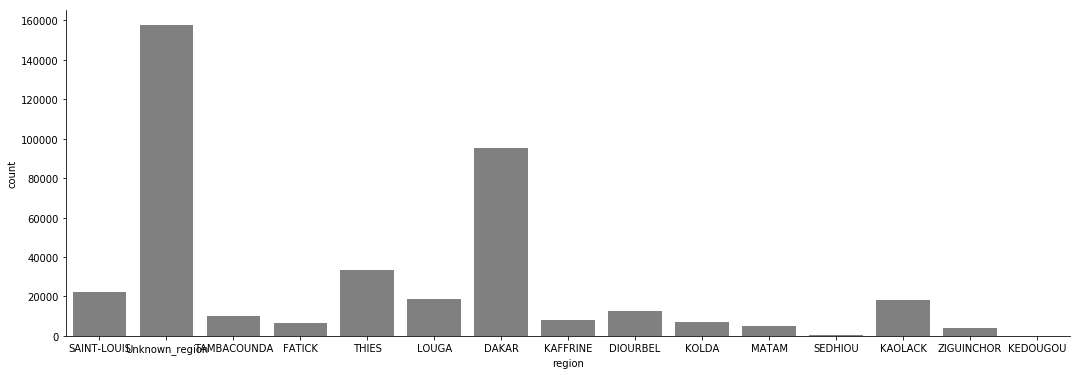

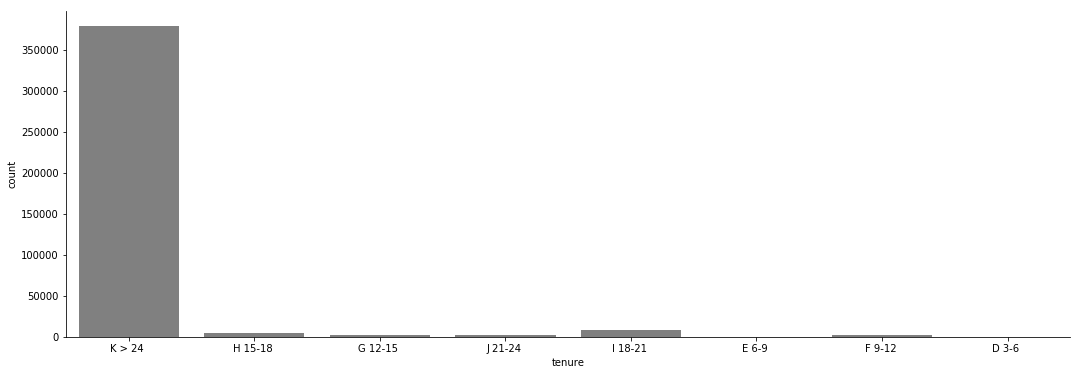

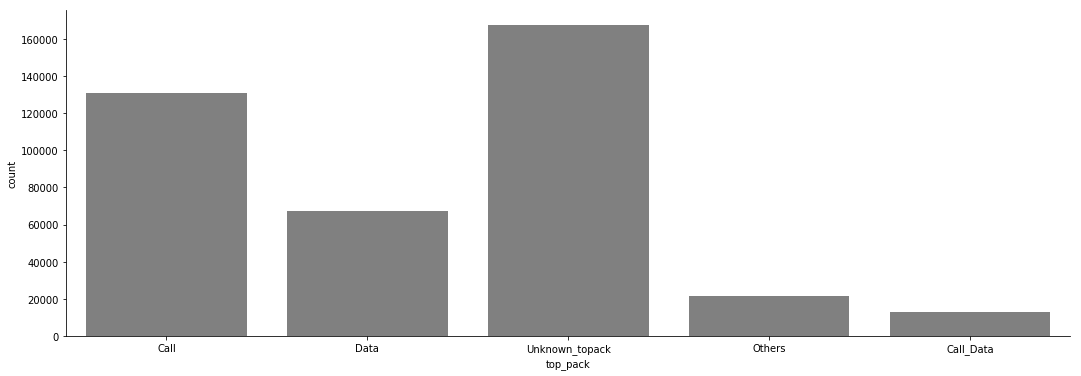

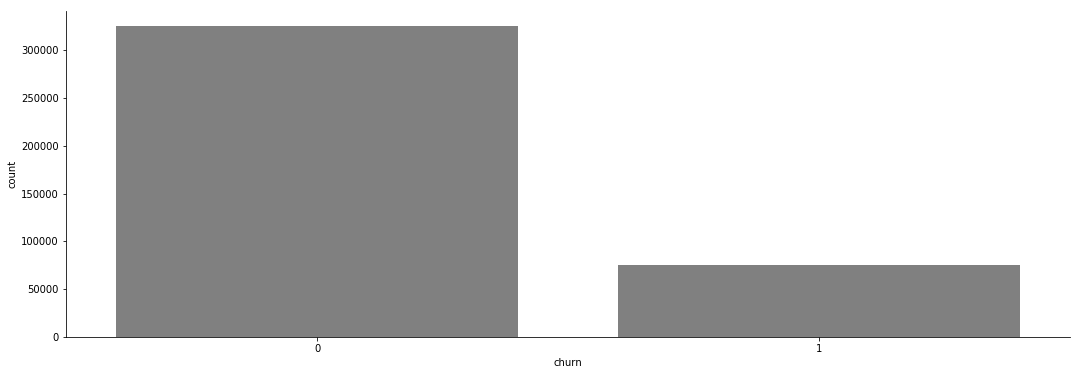

In [412]:
# Count plot for categorical

def count_plot(categorical, data):
    fig = plt.figure(edgecolor='white', figsize =(18,6))
    axes = fig.add_axes()
    
    
    sns.countplot(x = categorical, data = data, color = 'Grey', saturation=0.2, ax = axes)
#     sns.set_style()
    sns.despine()
#     rcParams['figure.figsize'] = 16,8
#     rcParams['axes.spines.top'] = False
#     rcParams['lines.linewidth'] = 2.5

for i in cat_col:
    count_plot(i, train)
    
    
# , RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r,

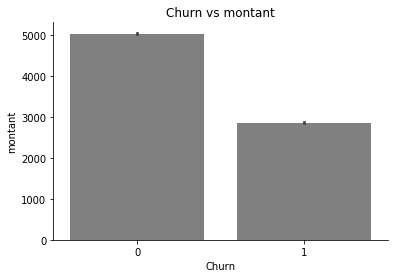

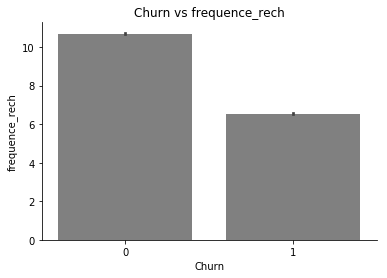

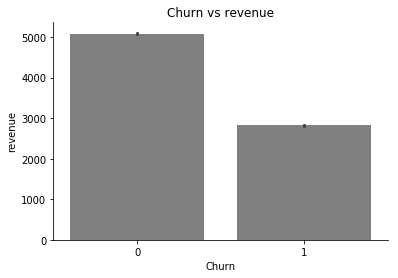

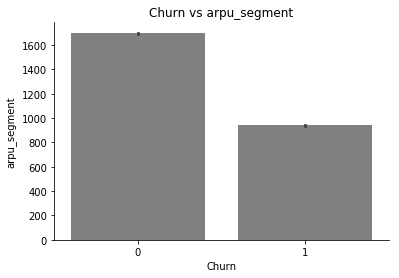

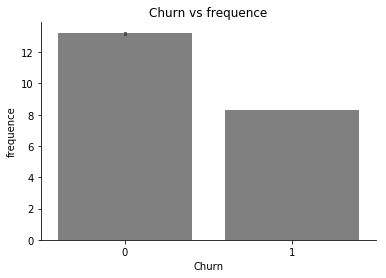

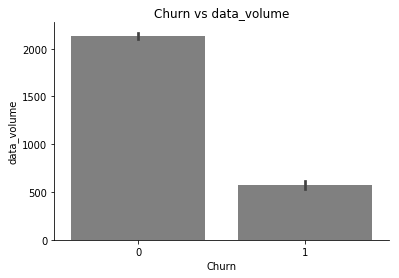

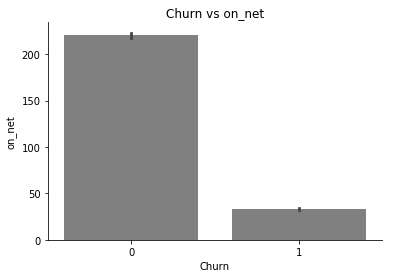

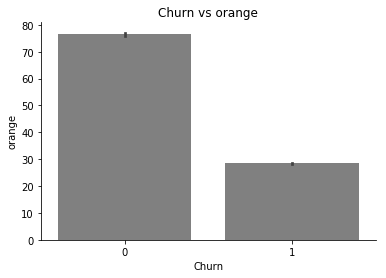

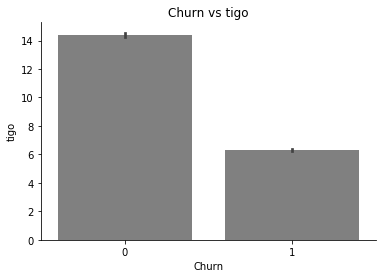

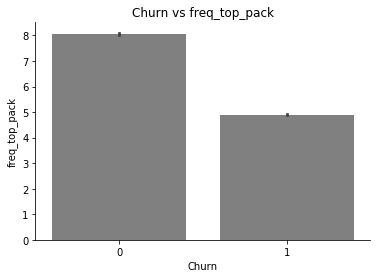

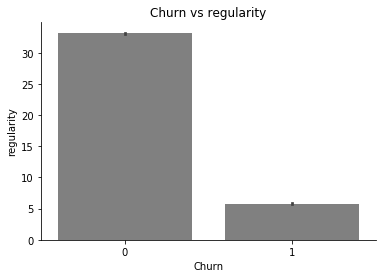

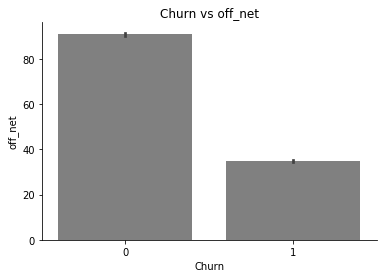

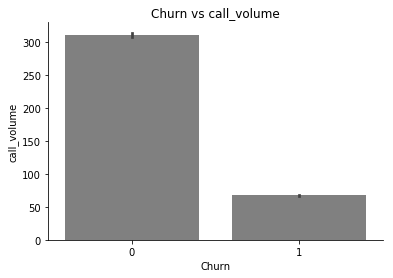

In [413]:
# Barplot for univariate categorical

def bar_plot(cat, num, data):
    plt.figure()
    sns.barplot(x=cat, y =num, data= data, color ='grey', saturation=0.2)
    sns.despine()
    plt.title("Churn vs " + num )
    plt.ylabel(num)
    plt.xlabel('Churn')
#     plt.tight_layout()

num_col = ['montant', 'frequence_rech', 'revenue','arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'regularity', 'off_net', 'call_volume']
for i in num_col:
    bar_plot('churn', i, train)

# plt.figure()
# sns.barplot(x='churn', y ='montant', data= train, color ='grey', saturation=0.2)

In [ ]:
# For a boxplot

In [416]:
# sns.heatmap(train.corr())
train.corr()

,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,freq_top_pack,churn,off_net,call_volume
montant,1.000000,0.808448,0.974696,0.974696,0.787252,0.275872,0.356312,0.672003,0.437056,0.493203,0.744960,-0.145367,0.690880,0.487148
frequence_rech,0.808448,1.000000,0.812319,0.812319,0.952118,0.176732,0.425780,0.539957,0.363874,0.510911,0.864174,-0.148603,0.557981,0.519407
revenue,0.974696,0.812319,1.000000,1.000000,0.799557,0.284724,0.359752,0.676157,0.436096,0.501339,0.756084,-0.148293,0.694326,0.491095
arpu_segment,0.974696,0.812319,1.000000,1.000000,0.799556,0.284724,0.359752,0.676157,0.436096,0.501338,0.756083,-0.148293,0.694326,0.491096
frequence,0.787252,0.952118,0.799557,0.799556,1.000000,0.192942,0.415416,0.496440,0.331198,0.537958,0.835913,-0.156751,0.512258,0.499231
data_volume,0.275872,0.176732,0.284724,0.284724,0.192942,1.000000,0.008351,0.058539,0.036562,0.203505,0.140637,-0.068731,0.059844,0.021648
on_net,0.356312,0.425780,0.359752,0.359752,0.415416,0.008351,1.000000,0.253662,0.168969,0.289740,0.380560,-0.103455,0.261686,0.974079
orange,0.672003,0.539957,0.676157,0.676157,0.496440,0.058539,0.253662,1.000000,0.433193,0.330834,0.574031,-0.116828,0.979213,0.461033
tigo,0.437056,0.363874,0.436096,0.436096,0.331198,0.036562,0.168969,0.433193,1.000000,0.215773,0.385078,-0.077468,0.607002,0.296492
regularity,0.493203,0.510911,0.501339,0.501338,0.537958,0.203505,0.289740,0.330834,0.215773,1.000000,0.422553,-0.479120,0.340263,0.344208


 - We see that revenue and arpu segment are totally correlated and have same correlation with others. we drop arpusegment
 - Likewise, montant and revenue are highly collinear, could they represent the samme thing? The top up amount should actually be same as the monthly income of the customer. These are redundant information and will be removed. We remove one of them.
 
 - We drop orange, tigo since they are now being represented by off_net
 


    

In [ ]:
train.drop('arpu_segment')

##### Visualising class separation by numeric features

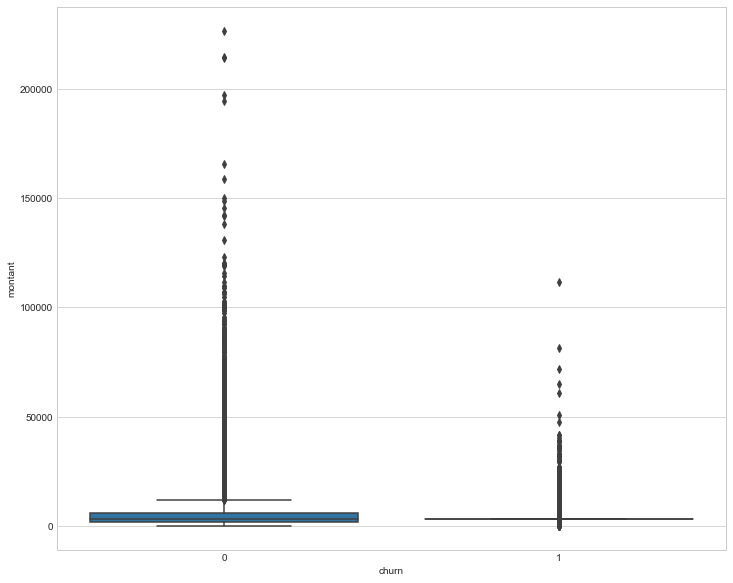

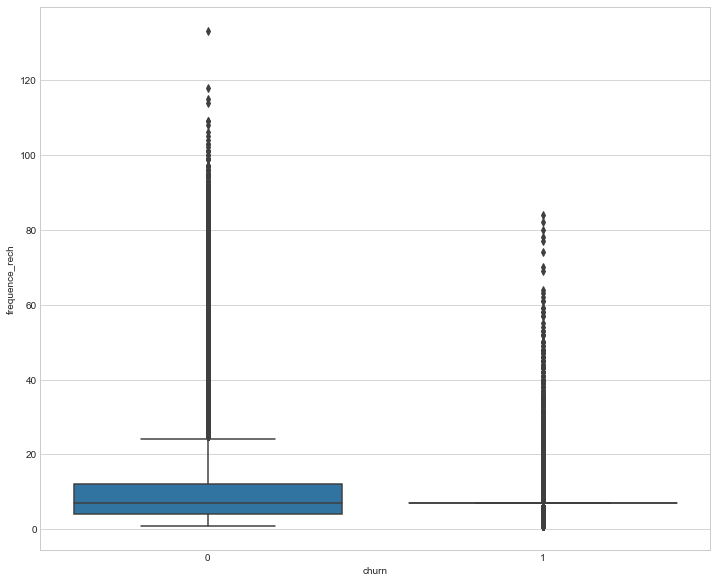

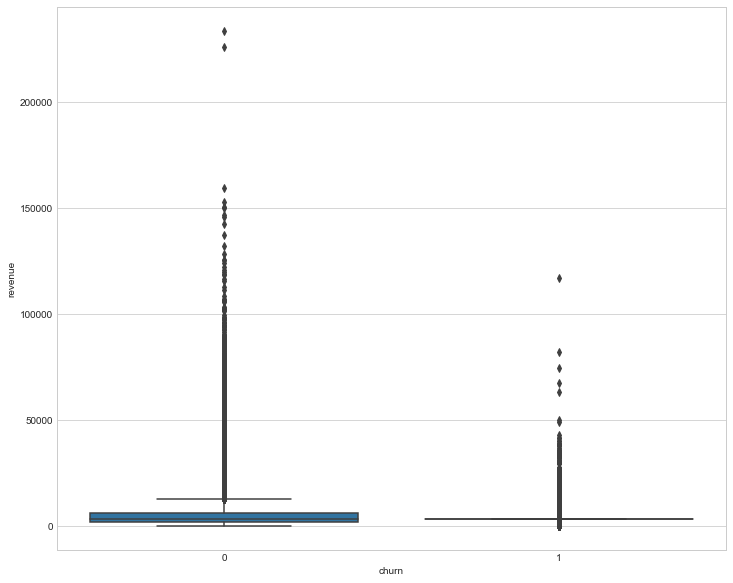

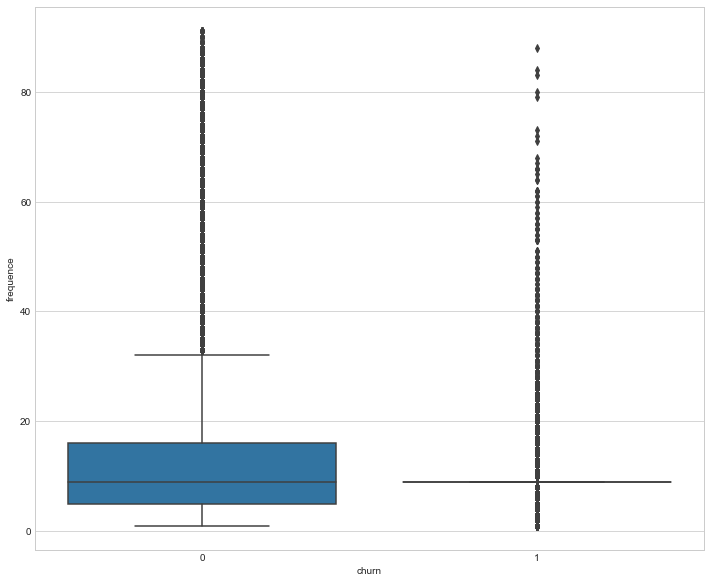

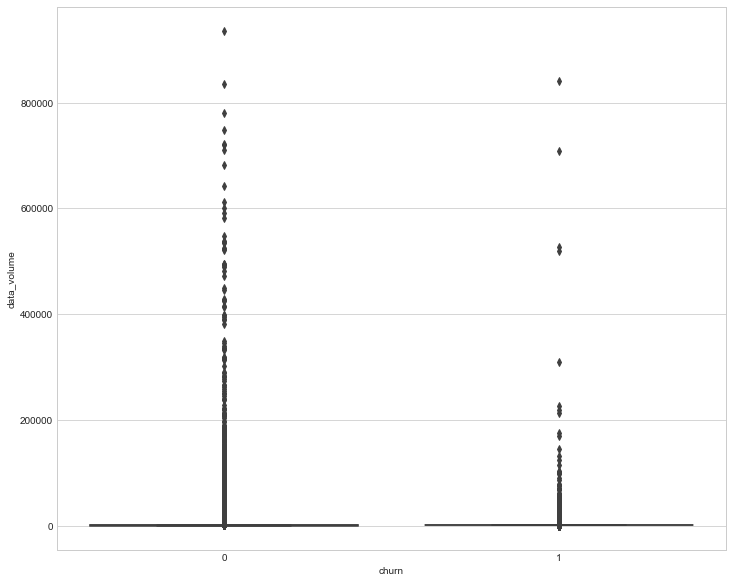

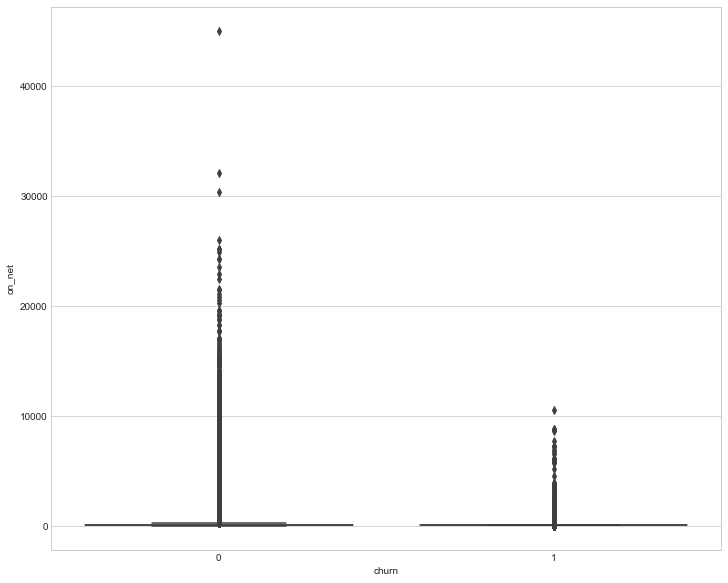

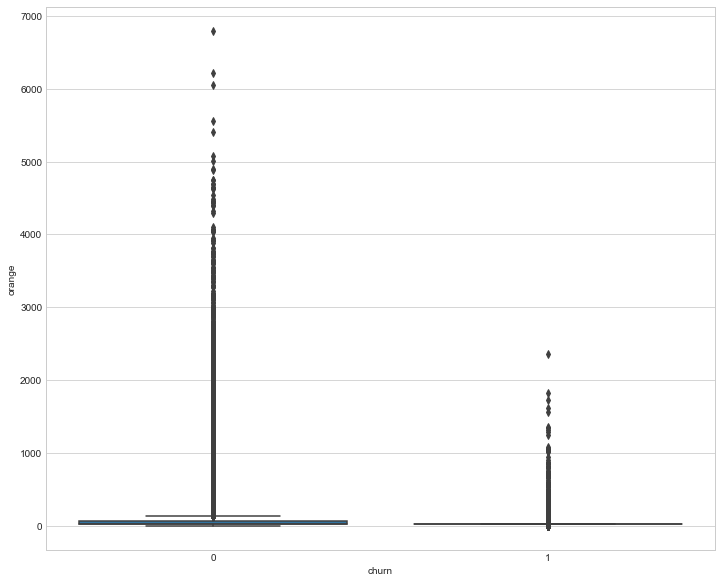

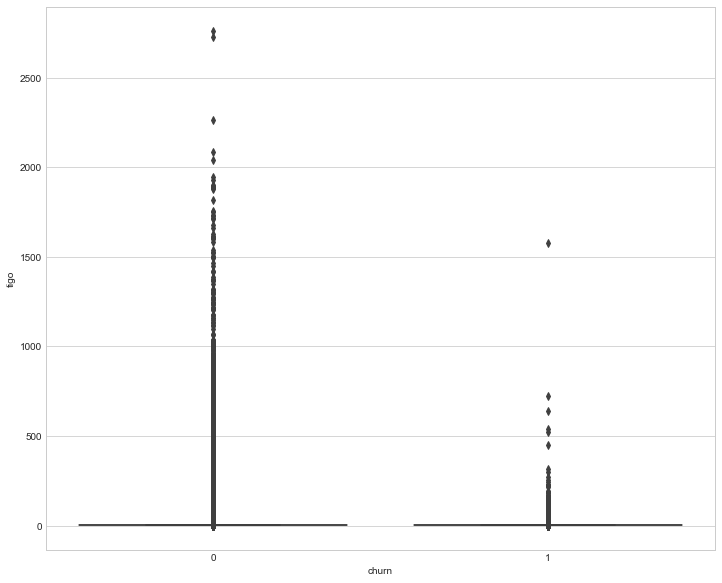

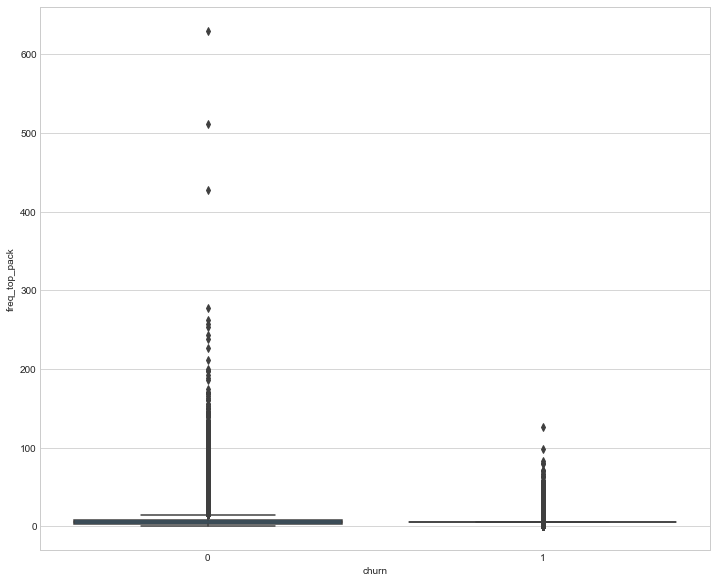

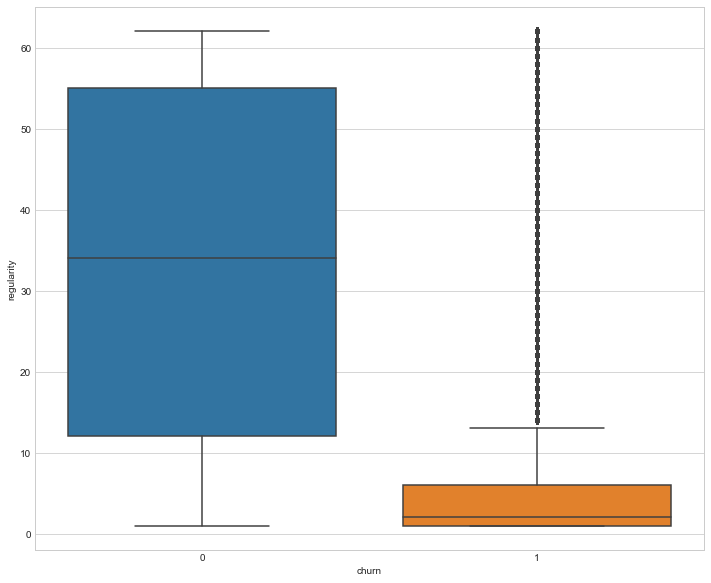

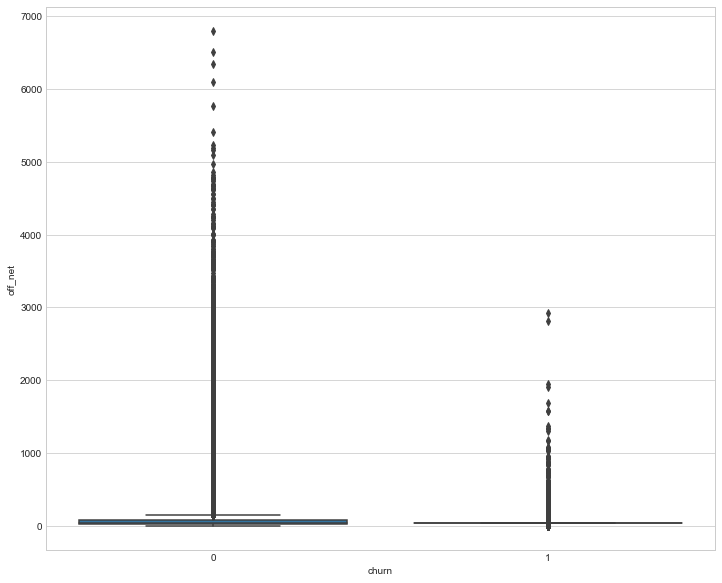

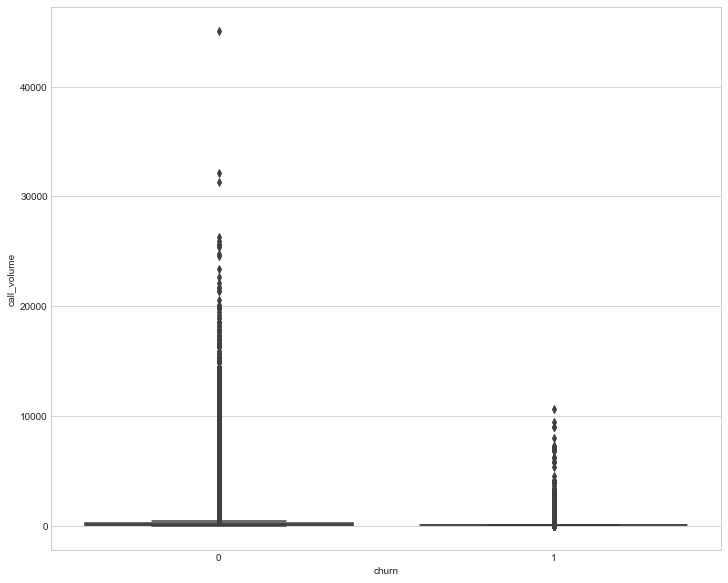

In [427]:
def plot_box(train, cols, col_x = 'churn'):
    for col in cols:
        plt.figure(figsize=(12,10))
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=train)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['montant', 'frequence_rech', 'revenue', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'regularity', 'off_net', 'call_volume']

plot_box(train, num_cols)

region


TypeError: unsupported operand type(s) for -: 'str' and 'float'

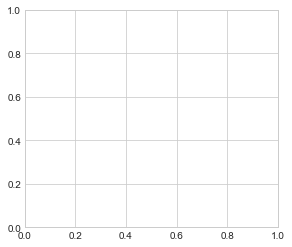

In [431]:
cat_colss = ['region', 'top_pack']

train['dummy'] = np.ones(shape = train.shape[0])
for col in cat_colss:
    print(col)
    counts = train[['dummy', 'churn', col]].groupby(['churn', col], as_index = False).count()
    temp = counts[counts['churn'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['churn'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n churn-not')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['bad_credit'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n churn-yes')
    plt.ylabel('count')
    plt.show()

In [425]:
# Regression plots (lm plot)

# sns.lmplot(x = 'montant', y = 'revenue', data = train)

# Scatter Matrix

# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(train['data_volume', 'call_volume']

KeyError: ('data_volume', 'call_volume')

In [323]:
# To find the skew of the distributions
for cols in num_col:
    skeww = train[cols].skew()
    print(cols, skeww)
    

montant 4.98127725694
frequence_rech 2.89441208778
revenue 4.66151028155
arpu_segment 4.66152333942
frequence 2.45170430989
data_volume 37.6440648168
on_net 10.594454467
orange 9.34732852753
tigo 17.7914542942
freq_top_pack 5.65074021516
regularity 0.247978076312
off_net 8.90630114815
call_volume 9.11410735852


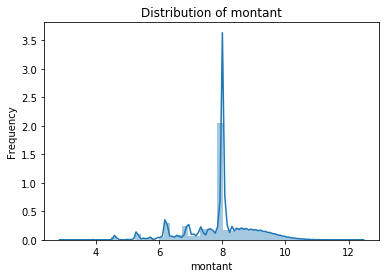

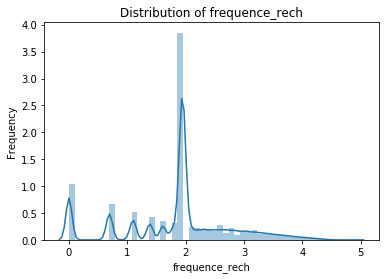

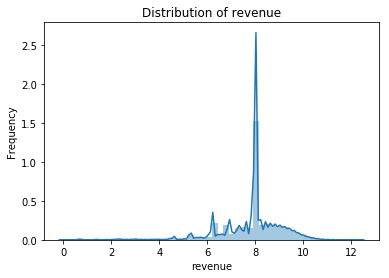

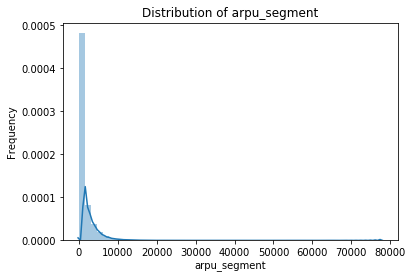

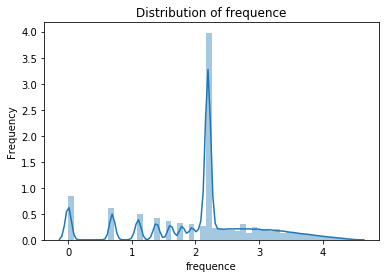

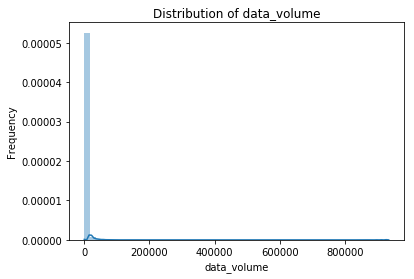

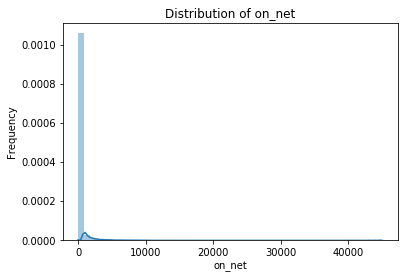

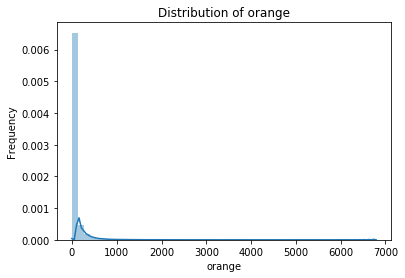

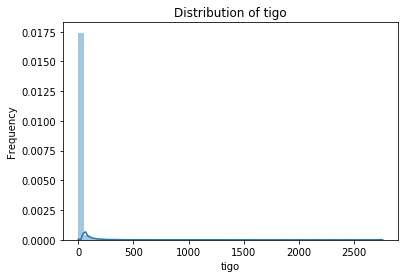

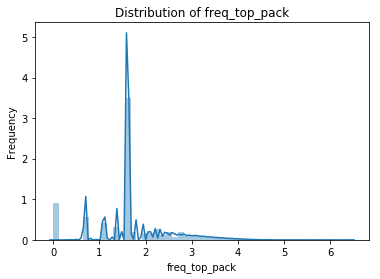

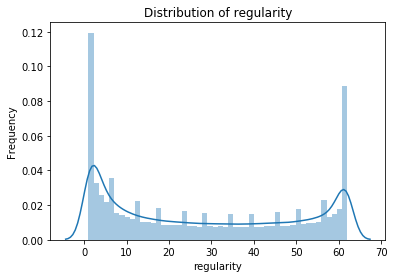

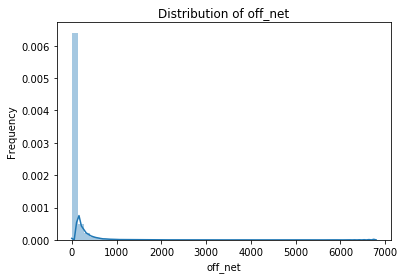

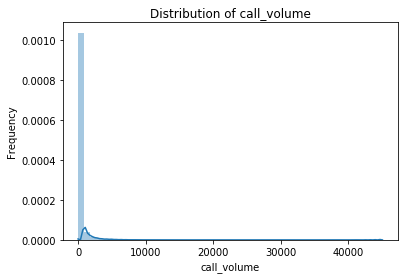

In [329]:
# Distribution plot for numeric variables

def dist_plot(numerical):
    plt.figure()
    sns.distplot(train[numerical])
    plt.title("Distribution of " + numerical)
    plt.ylabel("Frequency")
    plt.xlabel(numerical)
#     plt.tight_layout()
    plt.show()

for i in num_col:
    dist_plot(i)

In [324]:
train.describe()

,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,freq_top_pack,churn,off_net,call_volume
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.00000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.00000,400000.000000,400000.000000
mean,4638.184218,9.924307,4661.996512,1554.002203,12.284762,1843.27709,185.175302,67.453243,12.880145,28.046502,7.474577,0.18711,80.333388,265.508690
std,5846.168099,10.911098,5963.116995,1987.702283,12.183044,8888.92481,706.616942,159.985210,40.833450,22.282773,9.616928,0.39000,181.445622,774.165888
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000
25%,2000.000000,4.000000,1900.000000,633.000000,6.000000,240.00000,12.000000,20.000000,6.000000,6.000000,4.000000,0.00000,27.000000,41.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,268.00000,27.000000,28.000000,6.000000,24.000000,5.000000,0.00000,34.000000,61.000000
75%,4600.000000,10.000000,4698.000000,1566.000000,13.000000,301.00000,55.000000,41.000000,6.000000,51.000000,6.000000,0.00000,51.000000,140.000000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.00000,45011.000000,6788.000000,2758.000000,62.000000,629.000000,1.00000,6794.000000,45048.000000


#### Data Transformation
 - Here we use log transform and boxcox transform for the numeric variables that have shown a high percentage of skewness

In [325]:
skewed_col = ['montant', 'frequence_rech', 'revenue','arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'off_net', 'call_volume']

skewed_col_no_zero = ['montant', 'frequence_rech', 'revenue', 'frequence', 'freq_top_pack']
skewed_col_zero = ['arpu_segment', 'data_volume', 'on_net', 'orange', 'tigo', 'off_net', 'call_volume']

# to define and apply a log transform function

def log_transform(skewed):
    train[skewed] = np.log(train[skewed])
    skeww = train[skewed].skew()
    print(skewed, skeww)

for i in skewed_col_no_zero:
    log_transform(i)

montant -0.48194626885
frequence_rech -0.17262263372
revenue -1.66678766331
frequence -0.420715193656
freq_top_pack 0.218634593065


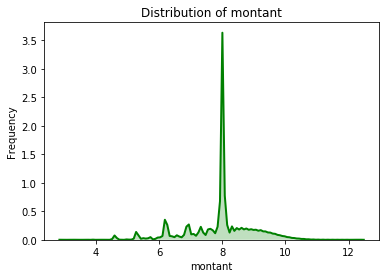

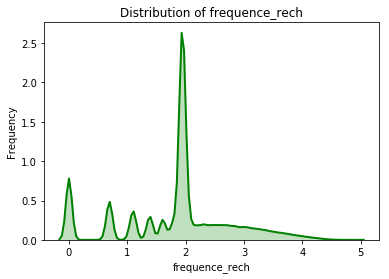

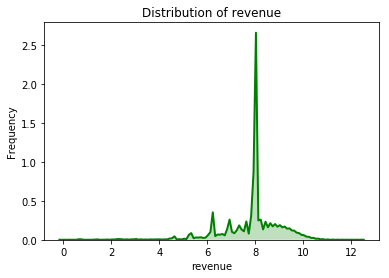

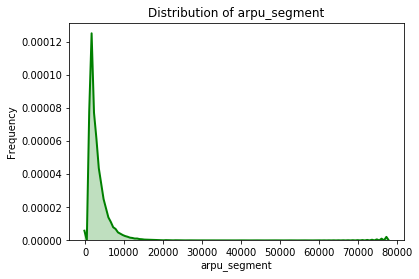

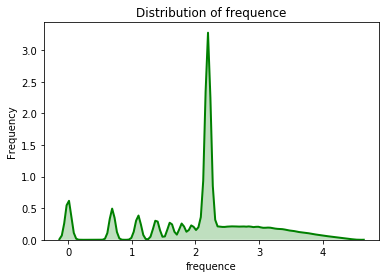

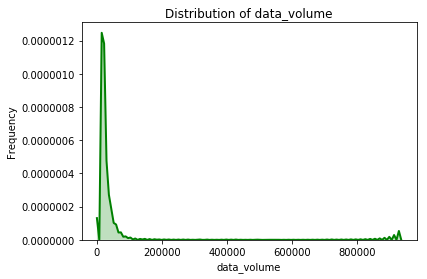

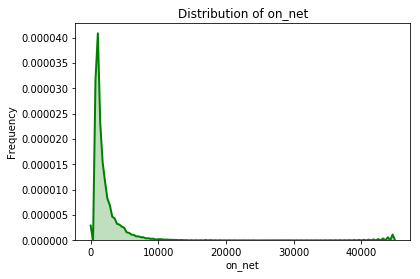

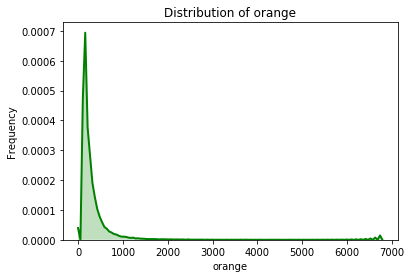

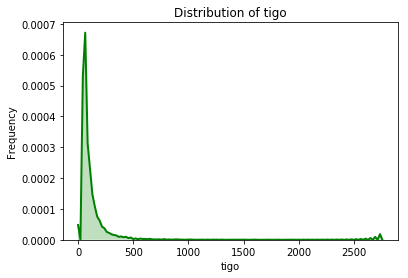

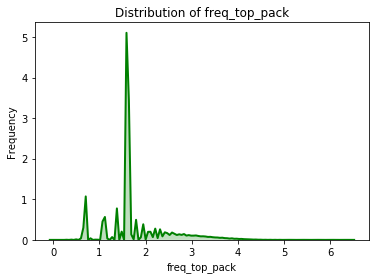

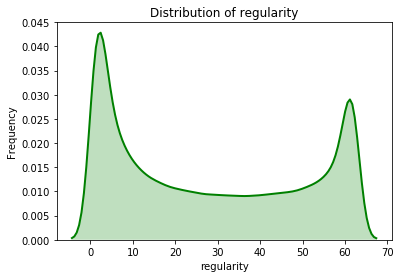

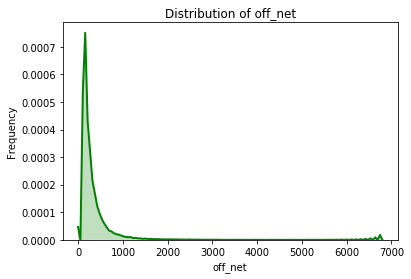

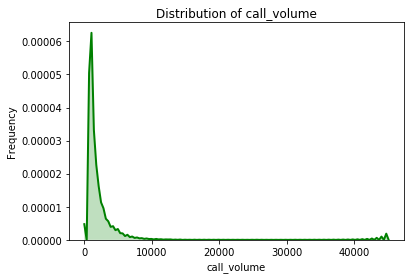

In [328]:
# plot to visualise and confirm the log transform

def dist_plot(numerical):
    plt.figure()
    sns.distplot(train[numerical], hist = False, kde_kws={'shade': True, 'linewidth':2},
                color ='green')
    plt.title("Distribution of " + numerical)
    plt.ylabel("Frequency")
    plt.xlabel(numerical)
#     plt.tight_layout()
    plt.show()

num_col = ['montant', 'frequence_rech', 'revenue','arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'regularity', 'off_net', 'call_volume']
for i in num_col:
    dist_plot(i)

 - We shall use a box Cox transformation for the rest of the variables

In [330]:
skewed_col_zero = ['arpu_segment', 'data_volume', 'on_net', 'orange', 'tigo', 'off_net', 'call_volume']

# to define and apply a boxcox transform function

def boxcox_transform(skewed):
    train[skewed] = stats.boxcox(train[skewed])[0]
    skeww = pd.Series(train[skewed]).skew()
    print(skewed, skeww)

for i in skewed_col_zero:
    boxcox_transform(i)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in log



arpu_segment nan
data_volume nan
on_net nan
orange nan
tigo nan
off_net nan
call_volume nan


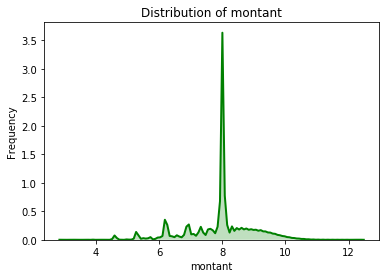

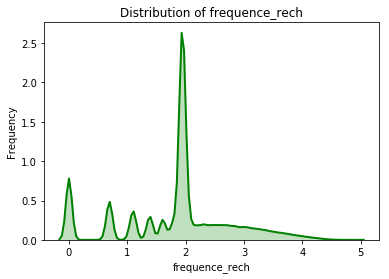

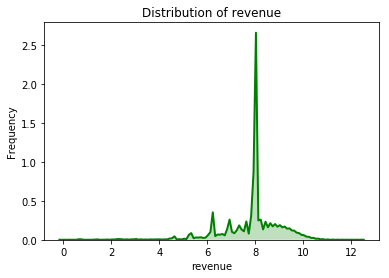

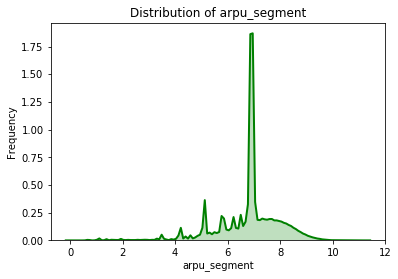

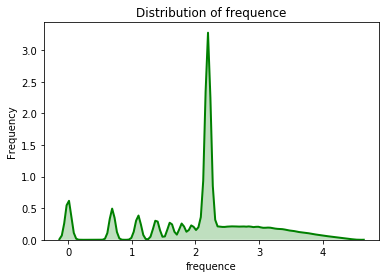

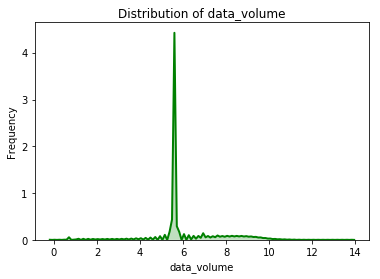

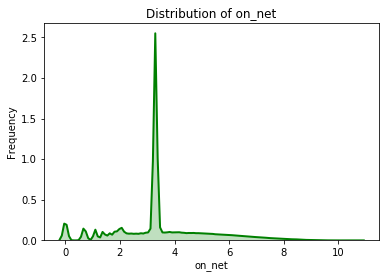

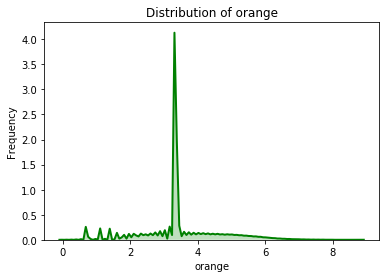

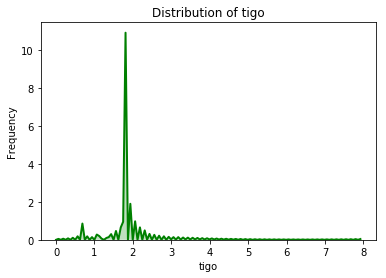

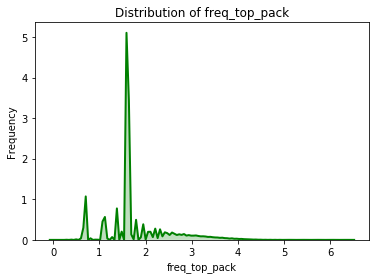

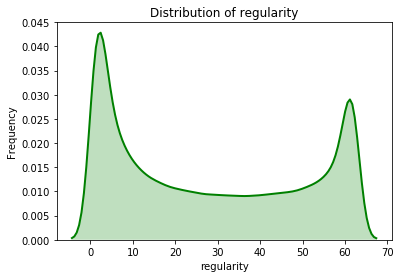

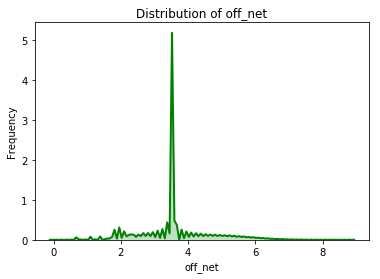

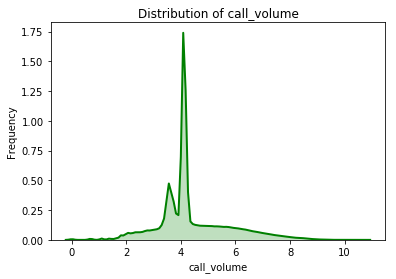

In [331]:
def dist_plot(numerical):
    plt.figure()
    sns.distplot(train[numerical], hist = False, kde_kws={'shade': True, 'linewidth':2},
                color ='green')
    plt.title("Distribution of " + numerical)
    plt.ylabel("Frequency")
    plt.xlabel(numerical)
#     plt.tight_layout()
    plt.show()

num_col = ['montant', 'frequence_rech', 'revenue','arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'regularity', 'off_net', 'call_volume']
for i in num_col:
    dist_plot(i)


In [ ]:
sns.barplot('churn', y = 'regularity', data = train)

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot('tenure', y = 'regularity', hue = 'churn', palette="viridis_r", data = train)

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot('tenure', y = 'regularity', hue = 'churn', palette="viridis_r", data = train)

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot('tenure', y = 'revenue', hue = 'churn', palette="viridis_r", data = train)

In [ ]:
sns.factorplot(x='montant', y='revenue', data = train, kind='point')